
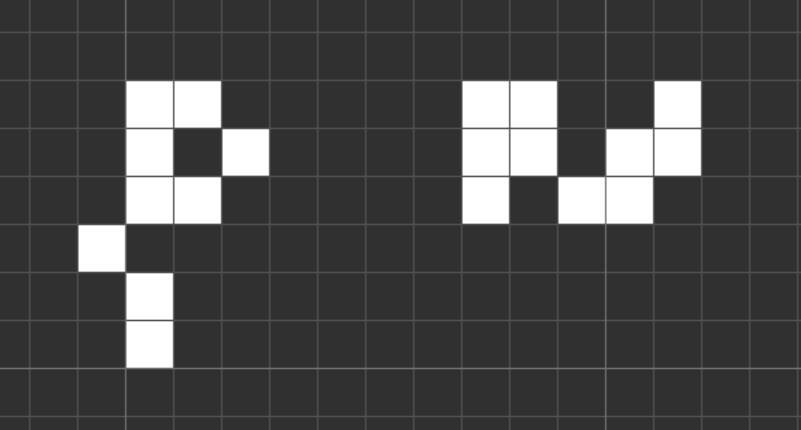

## **[Gra w Życie](https://pl.wikipedia.org/wiki/Gra_w_%C5%BCycie)**

Gra w życie (the game of life) to przykład [automatu komórkowego](https://pl.wikipedia.org/wiki/Automat_kom%C3%B3rkowy). 

Zobacz wywiad z twórcą gry w życie, matematykiem [Johnem Conway'em](https://pl.wikipedia.org/wiki/John_Horton_Conway), w którym opisuje zasady gry:

> https://youtu.be/E8kUJL04ELA?t=58

Własne wzory wygodnie jest testować korzystając z aplikacji [Golly](http://golly.sourceforge.net/)


### Zasady:

> Martwa komórka, która ma dokładnie 3 żywych sąsiadów, staje się żywa w następnej jednostce czasu (rodzi się)

> Żywa komórka z 2 albo 3 żywymi sąsiadami pozostaje nadal żywa; przy innej liczbie sąsiadów umiera (z „samotności” albo „zatłoczenia”).



 # **Zadanie** 

 1. Znajdź w internecie nietrywialne zastosowanie gry w życie.

 2. Uzupełnij poniższą implementację.


In [2]:
import matplotlib.pyplot as plt
import time
import copy
import numpy as np
from IPython.display import clear_output


# Przykładowe rozkłady początkowe
init = {
    "diehard": [[0, 0, 0, 0, 0, 0, 1, 0],
                [1, 1, 0, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 1, 1, 1]],

  
     "Glider": [[0, 0, 0, 0, 0],
             [0, 1, 0, 0, 0],
             [0, 1, 0, 1, 0],
             [0, 1, 1, 0, 0],
             [0, 0, 0, 0, 0]],
        
    "r_pentomino": [[0, 1, 1],
                    [1, 1, 0],
                    [0, 1, 0]],

    "pentadecathlon": [[1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 0, 1, 1, 1, 1, 0, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1]],

    "beacon": [[1, 1, 0, 0],
            [1, 1, 0, 0],
            [0, 0, 1, 1],
            [0, 0, 1, 1]],

    "acorn": [[0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0],
            [1, 1, 0, 0, 1, 1, 1]],

    "spaceship": [[0, 0, 1, 1, 0],
                [1, 1, 0, 1, 1],
                [1, 1, 1, 1, 0],
                [0, 1, 1, 0, 0]],

    "block_switch_engine": [[0, 0, 0, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 1, 0, 1, 1],
                            [0, 0, 0, 0, 1, 0, 1, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 0, 0],
                            [1, 0, 1, 0, 0, 0, 0, 0]],

    "infinite": [[1, 1, 1, 0, 1],
                [1, 0, 0, 0, 0],
                [0, 0, 0, 1, 1],
                [0, 1, 1, 0, 1],
                [1, 0, 1, 0, 1]],
}

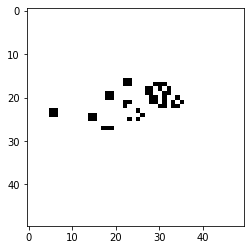

In [ ]:
# Implemetnacja gry w życie

def zycie(swiat):
  def nastepny_krok(swiat):
    def policz_sasiadow(swiat, wiersz, kolumna):
      liczba_sasiadow = -swiat[wiersz][kolumna]
      for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
          if (wiersz + i >= 0 and kolumna + j >= 0):
            try:
              # Tu uzupełniać
              liczba_sasiadow += swiat[wiersz+i, kolumna+j]
            except:
              pass
      return liczba_sasiadow
    
    nastepny_krok = copy.deepcopy(swiat)
    for id_wiersza, wiersz in enumerate(swiat):
      for id_kolumny, stan in enumerate(wiersz):
        liczba_sasiadow = policz_sasiadow(swiat, id_wiersza, id_kolumny)
        if (stan == 1):
          # Tu uzupełniać
          if (liczba_sasiadow < 2):
            nastepny_krok[id_wiersza][id_kolumny] = 0
          # Tu uzupełniać
          elif (liczba_sasiadow > 3):
            nastepny_krok[id_wiersza][id_kolumny] = 0

        elif (stan == 0):
          # Tu uzupełniać
          if (liczba_sasiadow == 3):
            # Tu uzupełniać
            nastepny_krok[id_wiersza][id_kolumny] = 1
    
    return nastepny_krok
  
  while True:
    clear_output(wait=True)
    time.sleep(0.1)
    swiat = nastepny_krok(swiat)
    plt.imshow(np.array(swiat), interpolation = 'nearest', cmap = plt.cm.binary)
    plt.show()


rozmiar_swiata_x = 50
rozmiar_swiata_y = 50

swiat = np.zeros((rozmiar_swiata_x, rozmiar_swiata_y))
name = "r_pentomino"
s1 = np.shape(init[name])[0]
s2 = np.shape(init[name])[1]

width = int(np.shape(swiat)[0]/2)
height = int(np.shape(swiat)[1]/2)

swiat[width:width + s1, height-s2:height] = init[name]

zycie(swiat)